In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = pdv.wrap.wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年12月30日 10时33分31秒] DEBUG    Dataset created: {'id': '20241230_103331__data_wrapper__vrdiYGKhEA',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method)
methods_selected = pdv.methods.ti_comp1()
logger.info(f"Methods {methods_selected} selecting finished")

[2024年12月30日 10时33分33秒] INFO     backend: python_function                                                    
                        INFO     Methods {'method': {'id': 'comp1', 'name': 'Component 1', 'source': 'offtheshelf',
                                 'platform': 'R'}, 'wrapper': {'type': 'linear_trajectory', 'topology_inference':  
                                 'fixed', 'trajectory_types': 'linear', 'input_required': 'expression', 'inputs':  
                                 input_id  required        type                                                    
                                 0  expression      True  expression                                               
                                 1      dimred     False   parameter                                               
                                 2        ndim     False   parameter                                               
                                 3   component     False   parameter}, 'contai

In [5]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectory(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpcjhhkg4w                                                         
                        DEBUG    ti_paga_function executing                                                        
                        DEBUG    priors: {}                                                                        
                        DEBUG    parameters: {'dimred': 'pca', 'ndim': 2, 'component': 1}                          
                        DEBUG    seed: None                                                                        
[2024年12月30日 10时33分34秒] INFO     Methods executing finished, model: {'id':                                   
                                       '20241230_103334__data_wrapper__HyvJEPsZJy', 'cell_ids': ['1_iN1_C01',      
                                       '1_iN1_C02', '1_iN1_C03', '1_iN1_C04', '1_iN1_C05', '1_iN1_C07',            
                                       '1_iN1_C08', '1_iN1_C09', '1_iN1_C10', 

[2024年12月30日 10时33分35秒] INFO     Coloring by grouping                                                        
                        DEBUG    selecting waypoints                                                               
[2024年12月30日 10时33分44秒] DEBUG    selecting waypoints shape is (201, 392), finished!                          
                        INFO     Result plotting finished                                                          


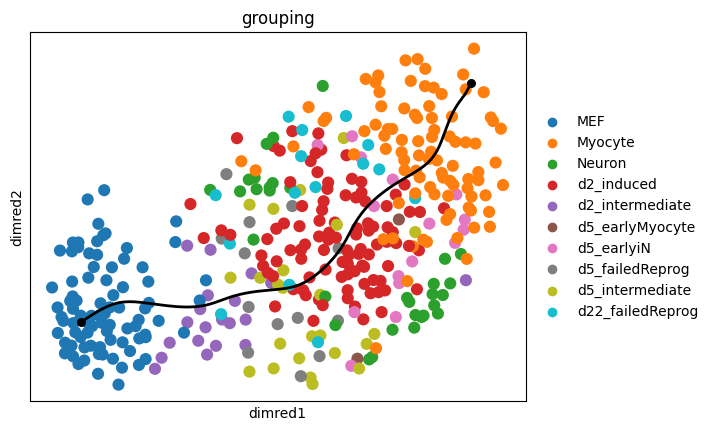

In [6]:
# 4. 绘制轨迹(dimred+plot)
model = pdv.wrap.add_dimred(model, pdv.dimred.dimred_mds,  expression_source=dataset["expression"])  # 提取降维结果
pdv.plot.plot_dimred(model, expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))
logger.info("Result plotting finished")